In [1]:
using Plots
using LinearAlgebra
using Random
using Luxor

In [2]:
function IAV_organization(viral_length, binding_radius)                                                 
    # ==============================================================================================================
    # IAV_organization(viral_length,binding_radius): specifies the x-y coordinates of HA and NA on the surface of an 
    # IAV viral particle.
    #     viral_length: length of the virus's main axis [m]
    #     binding_radius: distance between adjacent molecules [m]
    # Returns a set of HA coordinates, NA coordinates, and the corners of a rectangle which defines the maximum 
    # bounding rectangle of the IAV particle.
    # ==========================================================================
    
    # Calculating vertical heights
    height = sqrt(3) * binding_radius / 2
    height_twice = sqrt(3) * binding_radius

    height_max = viral_length / 2
    height_min = -viral_length / 2

    # Calculating y coordinates
    y0 = collect(height_min:height_twice:height_max)
    y1 = collect(height_min:height_twice:(height_max + height_twice))
    y2 = collect((height_min - height_twice):height_twice:(height_max + height_twice))

    # Calculating x coordinates
    x0 = zeros(length(y0))
    x1 = zeros(length(y1))
    x2 = zeros(length(y2))

    # Concatenating coordinates
    y_cord = vcat(y0, y1 .- height, y2, y1 .- height, y2, y1 .- height, y2, y1 .- height, y0)
    x_cord = vcat(x0 .- 2*binding_radius, x1 .- 3*binding_radius/2, x2 .- binding_radius, x1 .- binding_radius/2, x2, x1 .+ binding_radius/2, x2 .+ binding_radius, x1 .+ 3*binding_radius/2, x0 .+ 2*binding_radius)

    # Calculating corners of the bounding rectangle
    IAV_binding_rectangle_corners = [minimum(x_cord)-binding_radius maximum(y_cord)+binding_radius;
               maximum(x_cord)+binding_radius maximum(y_cord)+binding_radius;
               maximum(x_cord)+binding_radius minimum(y_cord)-binding_radius;
               minimum(x_cord)-binding_radius minimum(y_cord)-binding_radius]

    # Separating HA and NA positions
    i = findall(y_cord .< -2 * viral_length / 5)
    j = findall(y_cord .>= -2 * viral_length / 5)

    # Filter out NA and HA
    HA_coordinates = [x_cord[j] y_cord[j]]
    NA_coordinates = [x_cord[i] y_cord[i]]

    return HA_coordinates, NA_coordinates, IAV_binding_rectangle_corners
end

IAV_organization (generic function with 1 method)

In [29]:
function plotIAV()
    p = plot(IAV_binding_rectangle_corners_plot[:, 1], IAV_binding_rectangle_corners_plot[:, 2], marker=(:dot, 4), label="corners", grid=true, aspect_ratio=:equal, legend=true)
    scatter!(HA_coordinates[:, 1], HA_coordinates[:, 2], markersize=4, color="blue", label="HA")
    scatter!(NA_coordinates[:, 1], NA_coordinates[:, 2], markersize=4, color="red", label="NA")
    
    xlabel!("X-axis")
    ylabel!("Y-axis")
    title!("Plot of IAV organizations")
    display(plot!(p))
end

function plotIAV_SA_Bind()
    CarpetSA_coordinates, FloatingAntibody_coordinates, CleavedSA_coordinates, BindedAntibody_coordinates = filterParticlesbyNature(Particles_coordinates)
    CarpetSA_coordinates_inRect, CarpetSA_coordinates_outRect = filterParticlesbyRect(CarpetSA_coordinates)
    FloatingAntibody_coordinates_inRect, FloatingAntibody_coordinates_outRect = filterParticlesbyRect(FloatingAntibody_coordinates)
    
    p = plot(Boundary_rectangle_corners_plot[:, 1], Boundary_rectangle_corners_plot[:, 2], marker=(:dot, 4), color="black", label="boundary", grid=true, aspect_ratio=:equal, legend=true, loc="right", horiz=true)
    plot!(IAV_binding_rectangle_corners_plot[:, 1], IAV_binding_rectangle_corners_plot[:, 2], marker=(:dot, 4), color="black", label="corners")
    scatter!(HA_coordinates[:, 1], HA_coordinates[:, 2], markersize=6, color="blue", markerstrokewidth=0.5, label="HA")
    scatter!(NA_coordinates[:, 1], NA_coordinates[:, 2], markersize=6, color="red", markerstrokewidth=0.5, label="NA")

    scatter!(CarpetSA_coordinates_outRect[:, 2], CarpetSA_coordinates_outRect[:, 3], markersize=3, color="cyan", markerstrokecolor="cyan", label="SA_carpet")
    scatter!(CarpetSA_coordinates_inRect[:, 2], CarpetSA_coordinates_inRect[:, 3], markersize=4, color="cyan", markerstrokewidth=0.2, shape=:utriangle, label="SA_carpet_inRect")
    scatter!(FloatingAntibody_coordinates_outRect[:, 2], FloatingAntibody_coordinates_outRect[:, 3], markersize=3, color="lightgreen", markerstrokecolor="lightgreen", label="SA_suspension")
    scatter!(FloatingAntibody_coordinates_inRect[:, 2], FloatingAntibody_coordinates_inRect[:, 3], markersize=4, color="lightgreen", markerstrokewidth=0.2, shape=:utriangle, label="SA_suspension_inRect")
    
    scatter!(CleavedSA_coordinates[:, 2], CleavedSA_coordinates[:, 3], markersize=4, color="yellow", markerstrokewidth=0.2, shape=:utriangle, label="SA_suspension_inRect")
    scatter!(BindedAntibody_coordinates[:, 2], BindedAntibody_coordinates[:, 3], markersize=4, color="yellow", markerstrokewidth=0.2, shape=:utriangle, label="SA_suspension_inRect")

    _, SA_HA, SA_NA = filterSAbyBindingLigand(SA_coordinates)
    
    if !isempty(SA_HA)
        plot!([SA_HA[1, 3], SA_HA[1, 6]], [SA_HA[1, 4], SA_HA[1, 7]], line=(:pink, 2), label="SA-HA bind")
        for pair in eachrow(SA_HA[2:size(SA_HA, 1), :])
            plot!([pair[3], pair[6]], [pair[4], pair[7]], line=(:pink, 2), label="")
        end
    end
    if !isempty(SA_NA)
        plot!([SA_NA[1, 3], SA_NA[1, 6]], [SA_NA[1, 4], SA_NA[1, 7]], line=(:orange, 2), label="SA-NA bind")
        for pair in eachrow(SA_NA[2:size(SA_NA, 1), :])
            plot!([pair[3], pair[6]], [pair[4], pair[7]], line=(:orange, 2), label="")
        end
    end
    
    xlabel!("X-axis")
    ylabel!("Y-axis")
    title!("Plot of IAV inside SA with bind")
    plot!(size=(1280,960))

    return p
end

plotIAV_SA_Bind (generic function with 1 method)

In [30]:
function filterParticlesbyNature(coordinates::Matrix{Any})
    CarpetSA_coordinates = coordinates[coordinates[:, 1] .== CarpetSA, :]
    FloatingAntibody_coordinates = coordinates[coordinates[:, 1] .== FloatingAntibody, :]
    CleavedSA_coordinates = coordinates[coordinates[:, 1] .== CleavedSA, :]
    BindedAntibody_coordinates = coordinates[coordinates[:, 1] .== BindedAntibody, :]
    return CarpetSA_coordinates, FloatingAntibody_coordinates, CleavedSA_coordinates, BindedAntibody_coordinates
end
    
function filterParticlesbyRect(coordinates::Matrix{Any})
    polygon = Luxor.Point.(IAV_binding_rectangle_corners[:, 1], IAV_binding_rectangle_corners[:, 2])
    points = Luxor.Point.(coordinates[:, 2], coordinates[:, 3])
    inside = [isinside(p, polygon; allowonedge=true) for p in points]
    SA_coordinates_inRect = coordinates[inside, :]
    SA_coordinates_outRect = coordinates[.!inside, :]
    return SA_coordinates_inRect, SA_coordinates_outRect
end


function filterSAbyBindingLigand(coordinates::Matrix{Any})
    SA_Free = coordinates[coordinates[:, 5] .== Null, :]
    SA_HA = coordinates[coordinates[:, 5] .== HA, :]
    SA_NA = coordinates[coordinates[:, 5] .== NA, :]
    return SA_Free, SA_HA, SA_NA
end

# Partitions are inclusive for top left bottom right
# topLeft    | top    | topLeft
# ----------------------------------
# left       | center | right
# ----------------------------------
# bottomLeft | bottom | bottomRight
function filterSAbyOutOfBoundaryDirection(coordinates::Matrix{Any})
    top = coordinates[(coordinates[:, 3] .>= -Lmax) .& (coordinates[:, 3] .<= Lmax) .& (coordinates[:, 4] .>= Lmax), :]
    bottom = coordinates[(coordinates[:, 3] .>= -Lmax) .& (coordinates[:, 3] .<= Lmax) .& (coordinates[:, 4] .<= -Lmax), :]
    left = coordinates[(coordinates[:, 4] .>= -Lmax) .& (coordinates[:, 4] .<= Lmax) .& (coordinates[:, 3] .<= -Lmax), :]
    right = coordinates[(coordinates[:, 4] .>= -Lmax) .& (coordinates[:, 4] .<= Lmax) .& (coordinates[:, 3] .>= Lmax), :]
    topLeft = coordinates[(coordinates[:, 3] .< -Lmax) .& (coordinates[:, 4] .> Lmax), :]
    topRight = coordinates[(coordinates[:, 3] .> Lmax) .& (coordinates[:, 4] .> Lmax), :]
    bottomLeft = coordinates[(coordinates[:, 3] .< -Lmax) .& (coordinates[:, 4] .< -Lmax), :]
    bottomRight = coordinates[(coordinates[:, 3] .> Lmax) .& (coordinates[:, 4] .< -Lmax), :]
    return top, bottom, left, right, topLeft, topRight, bottomLeft, bottomRight
end

function shuffle(coordinates::Matrix{Any})
    row_indices = 1:size(coordinates, 1)
    shuffled_indices = Random.shuffle(row_indices)
    coordinates = coordinates[shuffled_indices, :]
    return coordinates
end

function SymmetricBoundary(coordinates::Matrix{Any})
    polygon = Luxor.Point.(Boundary_rectangle_corners[:, 1], Boundary_rectangle_corners[:, 2])
    points = Luxor.Point.(coordinates[:, 3], coordinates[:, 4])    
    inside = [isinside(p, polygon; allowonedge=true) for p in points]
    coordinates_inRect = coordinates[inside, :]
    coordinates_outRect = coordinates[.!inside, :]

    top, bottom, left, right, topLeft, topRight, bottomLeft, bottomRight = filterSAbyOutOfBoundaryDirection(coordinates_outRect)
    top[:, 4] = top[:, 4] .- Lmax
    bottom[:, 4] = bottom[:, 4] .+ Lmax
    left[:, 3] = left[:, 3] .+ Lmax
    right[:, 3] = right[:, 3] .- Lmax
    topLeft[:, 3] = topLeft[:, 3] .+ Lmax
    topLeft[:, 4] = topLeft[:, 4] .- Lmax
    topRight[:, 3] = topRight[:, 3] .- Lmax
    topRight[:, 4] = topRight[:, 4] .- Lmax
    bottomLeft[:, 3] = bottomLeft[:, 3] .+ Lmax
    bottomLeft[:, 4] = bottomLeft[:, 4] .+ Lmax
    bottomRight[:, 3] = bottomRight[:, 3] .- Lmax
    bottomRight[:, 4] = bottomRight[:, 4] .+ Lmax
    
    return vcat(coordinates_inRect, top, bottom, left, right, topLeft, topRight, bottomLeft, bottomRight)
end

SymmetricBoundary (generic function with 1 method)

In [31]:
# Warning: revision in place
# TODO: need to determine if cleaved SA will be denature which provent it from further binding
# Assumption: All binded SA are within Rect (As binded SA outside Rect should rupture)
# Run over all SA in Rect. For those binded SA, debind them by poff and cleave them by pcut. Release SA back to carpet, cleaved into suspension, or removed from simulation (if denature)
function DebindAndCleave()
    SA_coordinates_inRect, SA_coordinates_outRect = CutSAbyRect()
    
    if isempty(SA_coordinates_inRect) || (poff == 0 && pcut == 0)
        SA_coordinates = vcat(SA_coordinates, SA_coordinates_inRect)
        return
    end

    SA_Free, SA_HA, SA_NA = filterSAbyBindingLigand(SA_coordinates_inRect)

    if poff <= 1
        SA_HA_off_index = rand(size(SA_HA, 1)) .< poff
        SA_HA[SA_HA_off_index, 5] .= Null
    else
        SA_HA[:, 5] .= Null
    end
    
    if pcut <= 1
        SA_NA_off_index = rand(size(SA_HA, 1)) .< pcut
        SA_NA[SA_NA_off_index, 5] .= Null
        SA_NA[SA_NA_off_index, 2] .= suspension # TODO: if cleaved SA is denature, then set Restinglocation to Removed
    else
        SA_NA[:, 5] .= Null
        SA_NA[:, 2] .= suspension # TODO: if cleaved SA is denature, then set Restinglocation to Removed
    end

    global SA_coordinates = vcat(SA_coordinates_outRect, SA_Free, SA_HA, SA_NA)
end

# Warning: revision in place
function SimpleRandomDiffusion()    
    SA_Free, SA_HA, SA_NA = filterSAbyBindingLigand(SA_coordinates)
    SA_Free_carpet, SA_Free_suspension = filterSAbyRestingLocation(SA_Free)

    random_sign_index = rand(size(SA_Free_suspension, 1)) .>= 0.5
    random_sign = rand(size(SA_Free_suspension, 1))
    random_sign[random_sign_index] .= 1
    random_sign[.!random_sign_index] .= -1
    random_swap_index = rand(size(SA_Free_suspension, 1)) .<= 0.5
            
    dx = 2 * ds * rand(size(SA_Free_suspension, 1)) .- ds
    dy = random_sign .* sqrt.(ds.^2 .- dx.^2)
    
    dx_rand = copy(dx)
    dx_rand[random_swap_index, 1] = dy[random_swap_index, 1]
    dy_rand = copy(dy)
    dy_rand[random_swap_index, 1] = dx[random_swap_index, 1]

    SA_Free_suspension[:, 3] = SA_Free_suspension[:, 3] .+ dx_rand
    SA_Free_suspension[:, 4] = SA_Free_suspension[:, 4] .+ dy_rand
    
    SA_Free_suspension = SymmetricBoundary(SA_Free_suspension)
    
    global SA_coordinates = vcat(SA_Free_carpet, SA_Free_suspension, SA_HA, SA_NA)
end

# Warning: revision inplace
function Binding()
    SA_Free, SA_HA, SA_NA = filterSAbyBindingLigand(SA_coordinates)
    SA_Free_inRect, SA_Free_outRect = filterSAbyRect(SA_Free) # Partition the SA by IAV_binding_rectangle_corners to reduce computing time
    
    for Ligand in eachrow(HA_coordinates)
        n = Int(MAX_HA_BIND - Ligand[3])
        if n > 0
            # Computing distance and filtering out SA within the binding radius of the ligand
            SA_Free_inRect_inRadius_index = (sqrt.((SA_Free_inRect[:, 3] .- Ligand[1]).^2 + (SA_Free_inRect[:, 4] .- Ligand[2]).^2)) .<= r
            SA_Free_inRect_inRadius = SA_Free_inRect[SA_Free_inRect_inRadius_index, :]
            SA_Free_inRect_outRadius = SA_Free_inRect[.!SA_Free_inRect_inRadius_index, :]

            if size(SA_Free_inRect_inRadius, 1) != 0
                # Picking possible binding SA by pon
                Possible_bind_index = rand(size(SA_Free_inRect_inRadius, 1)) .< pon
                SA_Free_inRect_inRadius_possible_bind = SA_Free_inRect_inRadius[Possible_bind_index, :]
                SA_Free_inRect_inRadius_not_bind = SA_Free_inRect_inRadius[.!Possible_bind_index, :]

                if size(SA_Free_inRect_inRadius_possible_bind, 1) != 0
                    if size(SA_Free_inRect_inRadius_possible_bind, 1) > n
                        # Picking max n SA for bind
                        Pick_to_bind_index = randperm(size(SA_Free_inRect_inRadius_possible_bind, 1))[1:n]
                        SA_picked_bind = SA_Free_inRect_inRadius_possible_bind[Pick_to_bind_index, :]
                        Not_pick = setdiff(1:size(SA_Free_inRect_inRadius_possible_bind, 1), Pick_to_bind_index)
                        SA_Free_inRect_inRadius_possible_bind_not_picked = SA_Free_inRect_inRadius_possible_bind[Not_pick, :]
                        
                        # Store this bind info.
                        SA_picked_bind[:, 5:7] .= [HA Ligand[1] Ligand[2]]
                        Ligand[3] = Ligand[3] + size(SA_picked_bind,1)
                        SA_Free_inRect = vcat(SA_Free_inRect_outRadius, SA_Free_inRect_inRadius_not_bind, SA_Free_inRect_inRadius_possible_bind_not_picked, SA_picked_bind)
                    else
                        SA_picked_bind = SA_Free_inRect_inRadius_possible_bind
                        
                        # Store this bind info.
                        SA_picked_bind[:, 5:7] .= [HA Ligand[1] Ligand[2]]
                        Ligand[3] = Ligand[3] + size(SA_picked_bind,1)
                        SA_Free_inRect = vcat(SA_Free_inRect_outRadius, SA_Free_inRect_inRadius_not_bind, SA_picked_bind)
                    end
                end
            end
        end
    end
    
    for Ligand in eachrow(NA_coordinates)
        n = Int(MAX_NA_BIND - Ligand[3])
        if n > 0
            # Computing distance and filtering out SA within the binding radius of the ligand
            SA_Free_inRect_inRadius_index = (sqrt.((SA_Free_inRect[:, 3] .- Ligand[1]).^2 + (SA_Free_inRect[:, 4] .- Ligand[2]).^2)) .<= r
            SA_Free_inRect_inRadius = SA_Free_inRect[SA_Free_inRect_inRadius_index, :]
            SA_Free_inRect_outRadius = SA_Free_inRect[.!SA_Free_inRect_inRadius_index, :]

            if size(SA_Free_inRect_inRadius, 1) != 0
                # Picking possible binding SA by pon
                Possible_bind_index = rand(size(SA_Free_inRect_inRadius, 1)) .< pon
                SA_Free_inRect_inRadius_possible_bind = SA_Free_inRect_inRadius[Possible_bind_index, :]
                SA_Free_inRect_inRadius_not_bind = SA_Free_inRect_inRadius[.!Possible_bind_index, :]

                if size(SA_Free_inRect_inRadius_possible_bind, 1) != 0
                    if size(SA_Free_inRect_inRadius_possible_bind, 1) > n
                        # Picking max n SA for bind
                        Pick_to_bind_index = randperm(size(SA_Free_inRect_inRadius_possible_bind, 1))[1:n]
                        SA_picked_bind = SA_Free_inRect_inRadius_possible_bind[Pick_to_bind_index, :]
                        Not_pick = setdiff(1:size(SA_Free_inRect_inRadius_possible_bind, 1), Pick_to_bind_index)
                        SA_Free_inRect_inRadius_possible_bind_not_picked = SA_Free_inRect_inRadius_possible_bind[Not_pick, :]
                        
                        # Store this bind info.
                        SA_picked_bind[:, 5:7] .= [NA Ligand[1] Ligand[2]]
                        Ligand[3] = Ligand[3] + size(SA_picked_bind,1)
                        SA_Free_inRect = vcat(SA_Free_inRect_outRadius, SA_Free_inRect_inRadius_not_bind, SA_Free_inRect_inRadius_possible_bind_not_picked, SA_picked_bind)
                    else
                        SA_picked_bind = SA_Free_inRect_inRadius_possible_bind
                        
                        # Store this bind info.
                        SA_picked_bind[:, 5:7] .= [NA Ligand[1] Ligand[2]]
                        Ligand[3] = Ligand[3] + size(SA_picked_bind,1)
                        SA_Free_inRect = vcat(SA_Free_inRect_outRadius, SA_Free_inRect_inRadius_not_bind, SA_picked_bind)
                    end
                end
            end
        end
    end

    global SA_coordinates = vcat(SA_Free_inRect, SA_Free_outRect, SA_HA, SA_NA)
end


# Warning: revision inplace
function rotation(coordinateMatrix::Matrix{Float64}, rotationMatrix::Matrix{Float64})
    for row in 1:size(coordinateMatrix, 1)
        coordinateMatrix[row, 1:2] = rotationMatrix * coordinateMatrix[row, 1:2]
    end
end

# Warning: revision inplace
function translation(coordinateMatrix::Matrix{Float64}, translationVector::Vector{Float64})
    for row in 1:size(coordinateMatrix, 1)
        coordinateMatrix[row, 1:2] = coordinateMatrix[row, 1:2] + translationVector
    end
end

# Warning: revision inplace
function applyMovements()
    # Creates a 2x2 rotation matrix based on the delta_theta
    rotationMatrix = [cos(dMovement[3]) sin(dMovement[3]); -sin(dMovement[3]) cos(dMovement[3])]
    translationVector = dMovement[1:2]
    
    # Apply rotation and then translate based on change vector
    rotation(HA_coordinates, rotationMatrix)
    translation(HA_coordinates, translationVector)
    
    rotation(NA_coordinates, rotationMatrix)
    translation(NA_coordinates, translationVector)
    
    rotation(IAV_binding_rectangle_corners, rotationMatrix)
    translation(IAV_binding_rectangle_corners, translationVector)
end

applyMovements (generic function with 1 method)

In [42]:
function IAV_diffusion(nSimStep)
    # ==========================================================================
    # IAV_diffusion_mobile_SA(sname): simulates the diffusion
    # of a virus particle on a 2D surface with immobile sialic acid. Periodically
    # displays simulation progress, plotting HA locations (blue dots), NA
    # locations (red dots), sialic acid locations (green dots), and currently
    # bound sialic acid residues (black dots).
    # 
    # Inputs:
    #   sname: file name for saved results
    # Saved variables:
    #   NA_pos: coordinates of NA in the frame of the virus
    #   HA_pos: coordinates of HA in the frame of the virus
    #   P: virus position and orientation (column 1 = x, column 2 = y,
    #   column 3 = theta)
    #   S: sialic acid coordinates
    #   IB: indices of bound sialic acid
    #   Lmax: simulation window size
    #   kon: HA on rate
    #   kcat: NA catalytic rate
    #   koff: HA off rate
    #   t: time (simulation steps)
    # ==========================================================================
    for n in 1:nSimStep
        
        # Shuffle the HA and NA list so that we can sample binding SA in random order
        global HA_coordinates = shuffle(HA_coordinates)
        global NA_coordinates = shuffle(NA_coordinates)
        push!(ResultPlots, plotIAV_SA_Bind())
        
        # Binding
        # Binding()
        # push!(ResultPlots, plotIAV_SA_Bind())
        

        # Diffusion
        # SimpleRandomDiffusion()
        # push!(ResultPlots, plotIAV_SA_Bind())
        
        # Generate random movement subject to binding restriction
        # TODO:
        
        # Apply resulting movement [dx dy dtheta] from last iteration on IAV
        # applyMovements()
        # push!(ResultPlots, plotIAV_SA_Bind())
        
        # Cleave and debind SA stochastically
        # DebindAndCleave()
        # push!(ResultPlots, plotIAV_SA_Bind())

        # Remove removed SA
        # GarbageCollection()
    end
end

IAV_diffusion (generic function with 1 method)

[ Info: Saved animation to C:\Users\yuang\JupyterLab\tempREX_IAV_Diffusion\output\result_animation.gif


Plots.AnimatedGif("C:\\Users\\yuang\\JupyterLab\\tempREX_IAV_Diffusion\\output\\result_animation.gif")
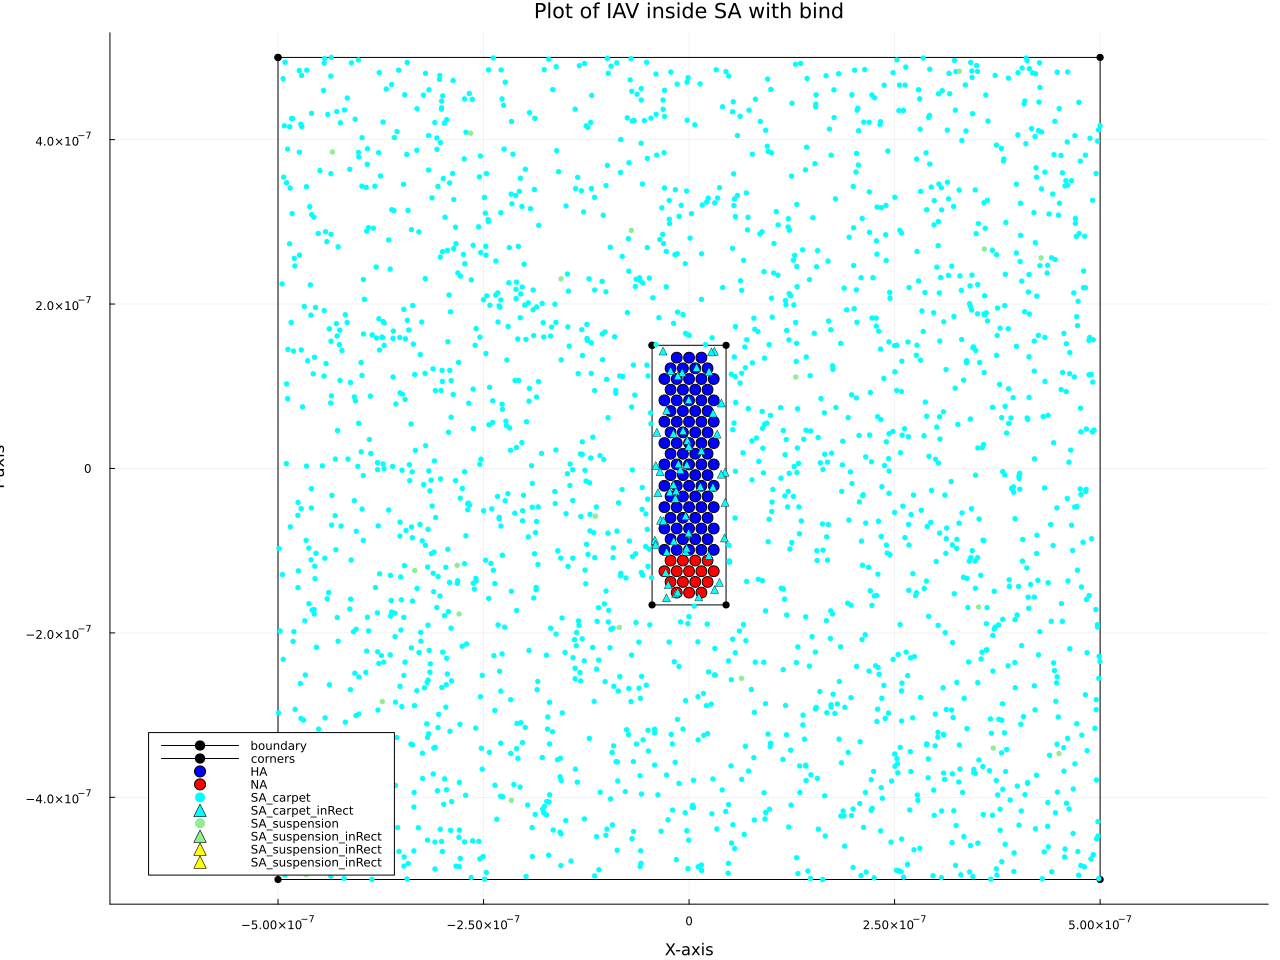

In [44]:
# Main Function

# Initiation: Mathematics Coefficients =====================================
# All coefficient adapted from Vachy and Fletcher's model [1]:
# Notice: original b has been replaced by r as the binding radius
    
dt = 0.2 # Time step [s]
ds = 1e-9 # SA step size [m]; related to SA diffusion coefficient through get_DSA.m

# Virus length (L), diameter (d), binding radius (r):
L = 0.25e-6; d = 0.1e-6; r = 7.5e-9

# Thermal energy (kT), viscosity (mu), window size (-Lmax to +Lmax)
kT = 1.38e-23 * 300; mu = 1e-3; Lmax = 0.5e-6

# Effective concentration of one SA within binding radius [mol/L]
cL = (1 / 6.02e23) / (1000 * 4/3 * π * r^3)     

# Translational & rotational mobilities
Dx = kT * (log(2 * L / d) - 1/2) / (2 * π * mu * L)
Dy = kT * (log(2 * L / d) + 1/2) / (4 * π * mu * L)
Dtheta = 3 * kT * (log(2 * L / d) - 1/2) / (π * mu * L^3)

kcat = 100      # Catalytic rate of NA (1/s)
kon = 400       # HA on rate (1/(Ms))
koff = 1        # HA off rate (1/s)
pon = kon * cL * dt  # Probability of binding in time step dt (HA-SA)
poff = koff * dt     # Probability of unbinding in time step dt (HA-SA)
pcut = kcat * dt     # Probability of cleaving SA in time step dt

# Mobility coefficients
mp = sqrt(2 * Dx * dt)
mt = sqrt(2 * Dy * dt)
mw = sqrt(2 * Dtheta * dt)
# ==========================================================================
    
# Initiation: Simulation Constant and Variables ============================
Random.seed!(hash("REX"))

# Save Result Plots
ResultPlots = Vector{Plots.Plot}()

# Maximum binding number
MAX_HA_BIND = 3
MAX_NA_BIND = 4
    
# Define movement vector, [delta x, delta y, delta theta]
dMovement = zeros(3, 1)

# Initialize HA and NA positions along with binding rectangle
# col 1 is ligand's x coordinates
# col 2 is ligand's y coordinates
# col 3 is ligand's current binding numbers
# col 4 is ligand's state (Working or Blocked)
@enum LigandState Working=0 Blocked=1
HA_coordinates, NA_coordinates, IAV_binding_rectangle_corners = IAV_organization(L, 2 * r)
HA_coordinates = hcat(HA_coordinates, zeros(Int, size(HA_coordinates, 1), 1)) # Add a column which keep track of the number of binds
NA_coordinates = hcat(NA_coordinates, zeros(Int, size(NA_coordinates, 1), 1)) # Add a column which keep track of the number of binds
NA_coordinates = hcat(NA_coordinates, fill(Working, size(NA_coordinates, 1))) # Add a column which keep track of the working state of ligands

# Add simulation boundaries 
Boundary_rectangle_corners = [-Lmax Lmax; Lmax Lmax; Lmax -Lmax; -Lmax -Lmax]

# For plotting purpose
IAV_binding_rectangle_corners_plot = vcat(IAV_binding_rectangle_corners, IAV_binding_rectangle_corners[1, :]')
Boundary_rectangle_corners_plot = [-Lmax Lmax; Lmax Lmax; Lmax -Lmax; -Lmax -Lmax; -Lmax Lmax]
    
# Number of sialic acid at carpet and in suspension
nCarpetSA = 2000
nFloatingAntibody = 20
    
# Initialize SA locations:
# col 1 is the NatureOfParticle enum (Removed or CarpetSA or FloatingAntibody)
# col 2 is SA's x coordinates
# col 3 is SA's y coordinates
# col 4 is the BindingLigand enum (Null or HA or NA)
# col 5 is ligand's x coordinates
# col 6 is ligand's y coordinates
@enum NatureOfParticle CarpetSA=1 FloatingAntibody=2 CleavedSA=3 BindedAntibody=4
@enum BindingLigand Null=0 HA=1 NA=2
Particles_coordinates = hcat(
    vcat(fill(CarpetSA, nCarpetSA), fill(FloatingAntibody, nFloatingAntibody)),
    vcat(2 * Lmax * (rand(nCarpetSA, 2) .- 0.5), 2 * Lmax * (rand(nFloatingAntibody, 2) .- 0.5)),
    fill(Null, nCarpetSA + nFloatingAntibody),
    fill(undef, nCarpetSA + nFloatingAntibody, 2)
)
# ==========================================================================

# Simulation ===============================================================
IAV_diffusion(10)
# ==========================================================================

# Save Result ==============================================================
# # Create an animation from the vector of plots
# rm("output", recursive=true)
# mkdir("output")
# index = 1
# for p in ResultPlots
#     savefig(p, "output/" * string(index) * ".png")
#     index = index + 1
# end
# display(ResultPlots[size(ResultPlots, 1)])
# savefig(ResultPlots[size(ResultPlots, 1)], "test.png")

anim = @animate for p in ResultPlots
    p
end
# # @gif(ResultPlots), vtk

# # # Save the animation as a GIF
gif(anim, "output/result_animation.gif", fps = 4)
# ==========================================================================

p1. anim not move

p2. no movement

p3. Need add more SA, so open boundary with adequate supply maybe